# Chapter 18: Other types of signals

For additional context see chapter 18 of [The Virus of Variation & Process Behavior Charts: A Guide for the Perplexed](https://www.brokenquality.com/book).

In [40]:
# Import libraries
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

%matplotlib inline

## Get data

In [47]:
# Coding dataset url
coding_url = r'https://raw.githubusercontent.com/jimlehner/the-virus-of-variation-and-pbcs/refs/heads/main/data/18-low-risk-high-volume-accounts-coding-data.csv'

# Get data
def get_data(dataset_url) -> pd.DataFrame:
    return pd.read_csv(dataset_url)

# Get data
coding_df = get_data(coding_url)

# Make 'DayNumber' column dtype string
coding_df['DayNumber'] = coding_df['DayNumber'].astype('string')

# Reduce coding_df to rows 1 to 70
coding_reduced = coding_df.copy()
coding_reduced = coding_reduced[:56]
coding_reduced.tail()

,Date,Month,Name of Month,Day of Month,DayNumber,Day of week,Add Count,Add Amount
51,05/22,5,May,22,52,Saturday,197,58115
52,05/23,5,May,23,53,Sunday,208,61360
53,05/24,5,May,24,54,Monday,400,118000
54,05/25,5,May,25,55,Tuesday,658,194110
55,05/26,5,May,26,56,Wednesday,531,156645


## Get Vienna General data

In [42]:
# Vienna General dataset URL
vienna_url = r'https://raw.githubusercontent.com/jimlehner/the-virus-of-variation-and-pbcs/refs/heads/main/data/01-vienna-general-yearly-births-deaths-ratio-by-clinic-data.csv'

# Get data
vienna_df = get_data(vienna_url)
# Set 'Year' column as string
vienna_df['Year'] = vienna_df['Year'].astype('string')
vienna_df.head()

,Clinic,Employee,Year,Births,Deaths,Death-to-Birth Ratio,Note
0,1st Clinic,Students & Doctors,1833,3737,197,5.3,Second clinic started
1,1st Clinic,Students & Doctors,1834,2657,205,7.7,NaN
2,1st Clinic,Students & Doctors,1835,2573,143,5.6,NaN
3,1st Clinic,Students & Doctors,1836,2677,200,7.5,NaN
4,1st Clinic,Students & Doctors,1837,2765,251,9.1,NaN


### Split vienna dataframe according to clinic

In [43]:
# Get clinic groups
grouped_df = vienna_df.groupby('Clinic')

# Create first and second clinic dataframes
first_clinic = grouped_df.get_group('1st Clinic')
second_clinic = grouped_df.get_group('2nd Clinic').reset_index(drop=True)

## Fig 18.1: Rule 1 satisfied

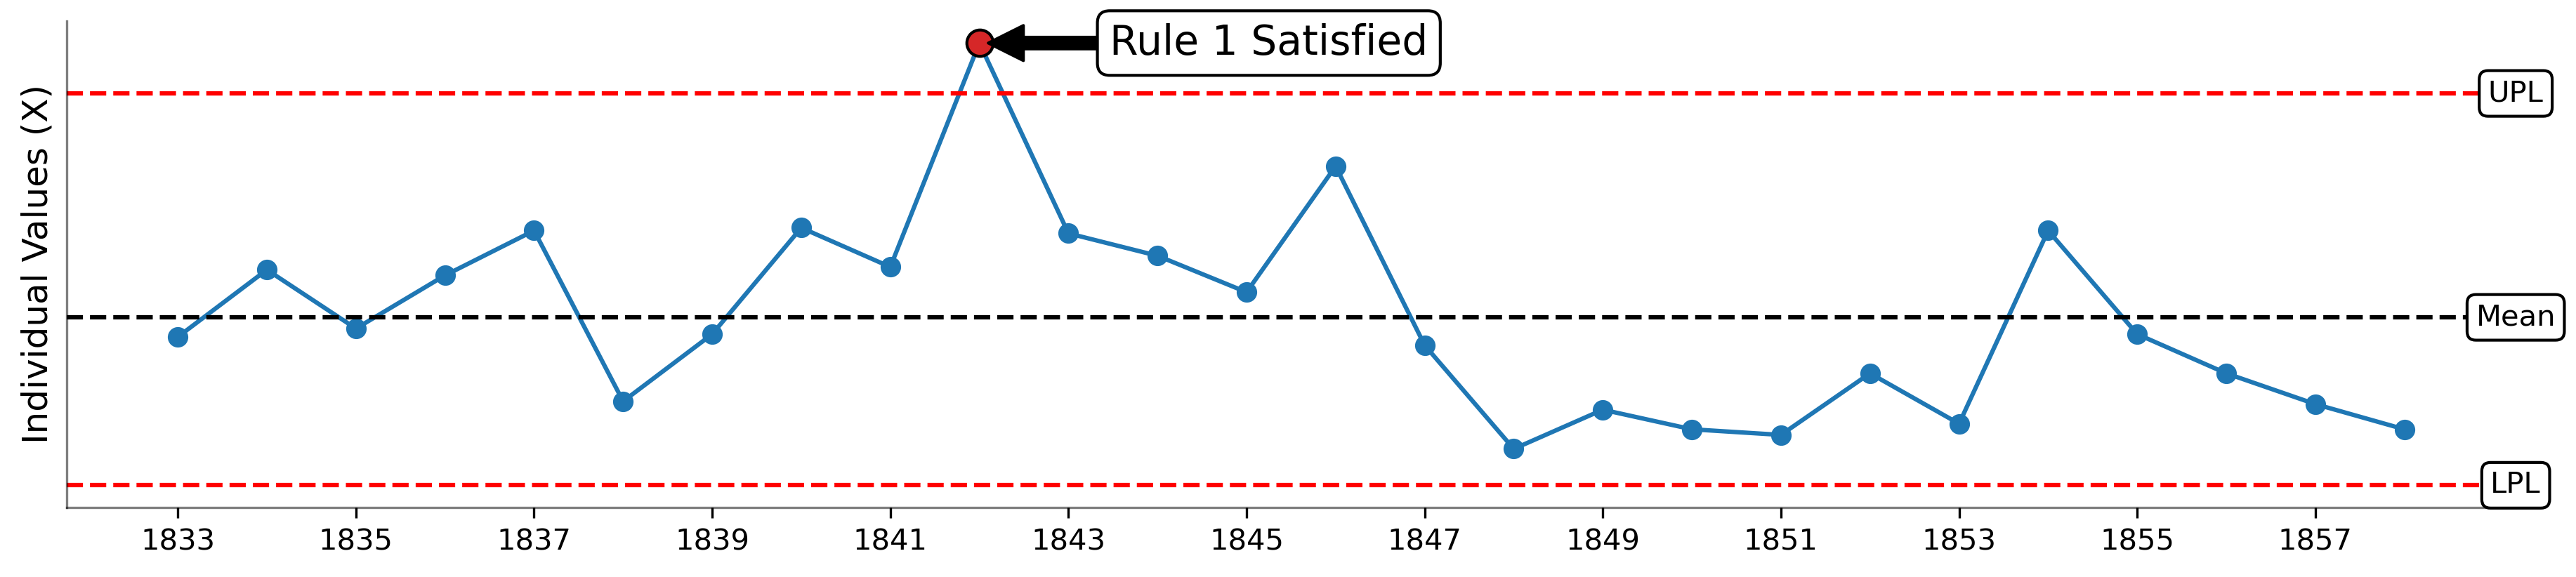

In [44]:
# Specify round_value
round_value = 0

# Specify tickinterval
tickinterval = 2

# Disaggregate the dataframe 
data = first_clinic["Death-to-Birth Ratio"]
moving_ranges = round(abs(data.diff()),round_value)
labels = first_clinic["Year"]

# Add moving ranges to df as column
first_clinic = first_clinic.copy()
first_clinic['Moving Ranges'] = pd.Series(moving_ranges)

# Calculate the mean
mean = round(data.mean(),round_value)
# Calculate the average moving range 
average_mR = round(moving_ranges.mean(),round_value)

# Define the value of C1 and C2and calculate the UPL and LPL
C1 = 2.660
C2 = 3.268
# Calculate the process limits
UPL = round(mean + (C1*average_mR),round_value)
LPL = max(0,round(mean - (C1*average_mR),round_value))
# Calculate process limit range (PLR)
PLR = UPL - LPL

# Calculate the Upper Range Limit
URL = round(C2*average_mR, round_value)

# Create masking parameters for values greater than and less than the process limits on X-chart
upper_lim = np.ma.masked_where(data < UPL, data)
lower_lim = np.ma.masked_where(data > LPL, data)
# Create masking parameters for values greater than URL on mR-chart
url_greater = np.ma.masked_where(moving_ranges <= URL, moving_ranges)
url_less = np.ma.masked_where(moving_ranges > URL, moving_ranges)

# Create list of tuples that specify value and color for mean, AmR, UPL, LPL, and URL
xchart_lines = [(mean,'black'), (UPL,'red'), (LPL,'red')]
mrchart_lines = [(average_mR,'black'), (URL,'red')]
# Create list of tuples with y-coordinate and labels for x-chart process limits and centerline 
xchart_labels = [(UPL,UPL),(LPL,LPL),(mean,mean)]
# Create list of tuples with y-coordinate and labels for mR-chart process limit and centerline
mrchart_labels = [(URL,URL),(average_mR,average_mR)]

# Generate the X-chart
fig, ax = plt.subplots(figsize=(15,3), dpi=300)

# Plot data 
ax.plot(labels, data, marker='o')

# Add masking parameters to color values outside process limits
ax.plot(labels, lower_lim, marker='o', ls='none', color='tab:red',
        markeredgecolor='black', markersize=9)
ax.plot(labels, upper_lim, marker='o', ls='none', color='tab:red',
        markeredgecolor='black', markersize=9)

# Add text labels for limits and centerline
bbox_props = dict(boxstyle="round,pad=0.3", fc="white", ec="black", lw=1)
ax.text(ax.get_xlim()[1], UPL, 'UPL', color='black', ha='center', va='center', bbox=bbox_props)
ax.text(ax.get_xlim()[1], LPL, 'LPL', color='black', ha='center', va='center', bbox=bbox_props)
ax.text(ax.get_xlim()[1], mean, 'Mean', color='black', ha='center', va='center', bbox=bbox_props)

# Add centerline and process limits 
for value, color in xchart_lines:
    plt.axhline(value, ls='--', c=color)

# Specify spine visibility 
ax.spines[['top','right']].set_visible(False)
ax.spines[['left','bottom']].set_alpha(0.5)

# Set the x-tick labels with increased intervals
tick_interval = tickinterval  # Increase this value to increase the spacing between ticks
tick_positions = np.arange(0, len(labels), tick_interval)
ax.set_xticks(tick_positions)
ax.set_xticklabels(labels.iloc[tick_positions], rotation=0, ha='center') 

# Specify axis labels and title
plt.xlabel("",fontsize=12)
plt.ylabel("Individual Values (X)", fontsize=12)
plt.title("", fontsize=14)

# Add annotation for highlighting value that satisfies Rule 1
plt.annotate('Rule 1 Satisfied', 
             xy=(9.1, 15.8),  # x, y coordinates of the annotation
             xytext=(12.25, 15.8),  # Position of the text
             fontsize=14,
             color='black',
             horizontalalignment='center',
             verticalalignment='center', 
             bbox=dict(facecolor='white', edgecolor='black', boxstyle='round'), 
             arrowprops=dict(facecolor='black'))

ax.set_yticks([])

# Show plot
plt.show()

## Fig 18.2: Rule 2 satisfied

In [48]:
# Specify round_value
round_value = 0

# Specify tickinterval
tickinterval = 5

# Disaggregate the dataframe 
data = coding_reduced['Add Count']
moving_ranges = abs(coding_reduced['Add Count'].diff())
labels = coding_reduced["DayNumber"]

# # Add moving ranges to df as column
# coding_reduced = coding_reduced.copy()
# coding_reduced['Moving Ranges'] = pd.Series(moving_ranges)

# Calculate the mean
mean = round(data.mean(), round_value)
# Calculate the average moving range 
average_mR = round(moving_ranges.mean(), round_value)

# Define the value of C1 and C2and calculate the UPL and LPL
C1 = 2.660
C2 = 3.268
# Calculate the process limits
UPL = round(mean + (C1*average_mR), round_value)
LPL = max(round(mean - (C1*average_mR), round_value),0)
# Calculate process limit range (PLR)
PLR = UPL - LPL

# Calculate the Upper Range Limit
URL = round(C2*average_mR,round_value)

# Create masking parameters for values greater than and less than the process limits on X-chart
upper_lim = np.ma.masked_where(data < UPL, data)
lower_lim = np.ma.masked_where(data > LPL, data)
# Create masking parameters for values greater than URL on mR-chart
url_greater = np.ma.masked_where(moving_ranges <= URL, moving_ranges)
url_less = np.ma.masked_where(moving_ranges > URL, moving_ranges)

# Create list of tuples that specify value and color for mean, AmR, UPL, LPL, and URL
xchart_lines = [(mean,'black'), (UPL,'red'), (LPL,'red')]
mrchart_lines = [(average_mR,'black'), (URL,'red')]
# Create list of tuples with y-coordinate and labels for x-chart process limits and centerline 
xchart_labels = [(UPL,UPL),(LPL,LPL),(mean,mean)]
# Create list of tuples with y-coordinate and labels for mR-chart process limit and centerline
mrchart_labels = [(URL,URL),(average_mR,average_mR)]

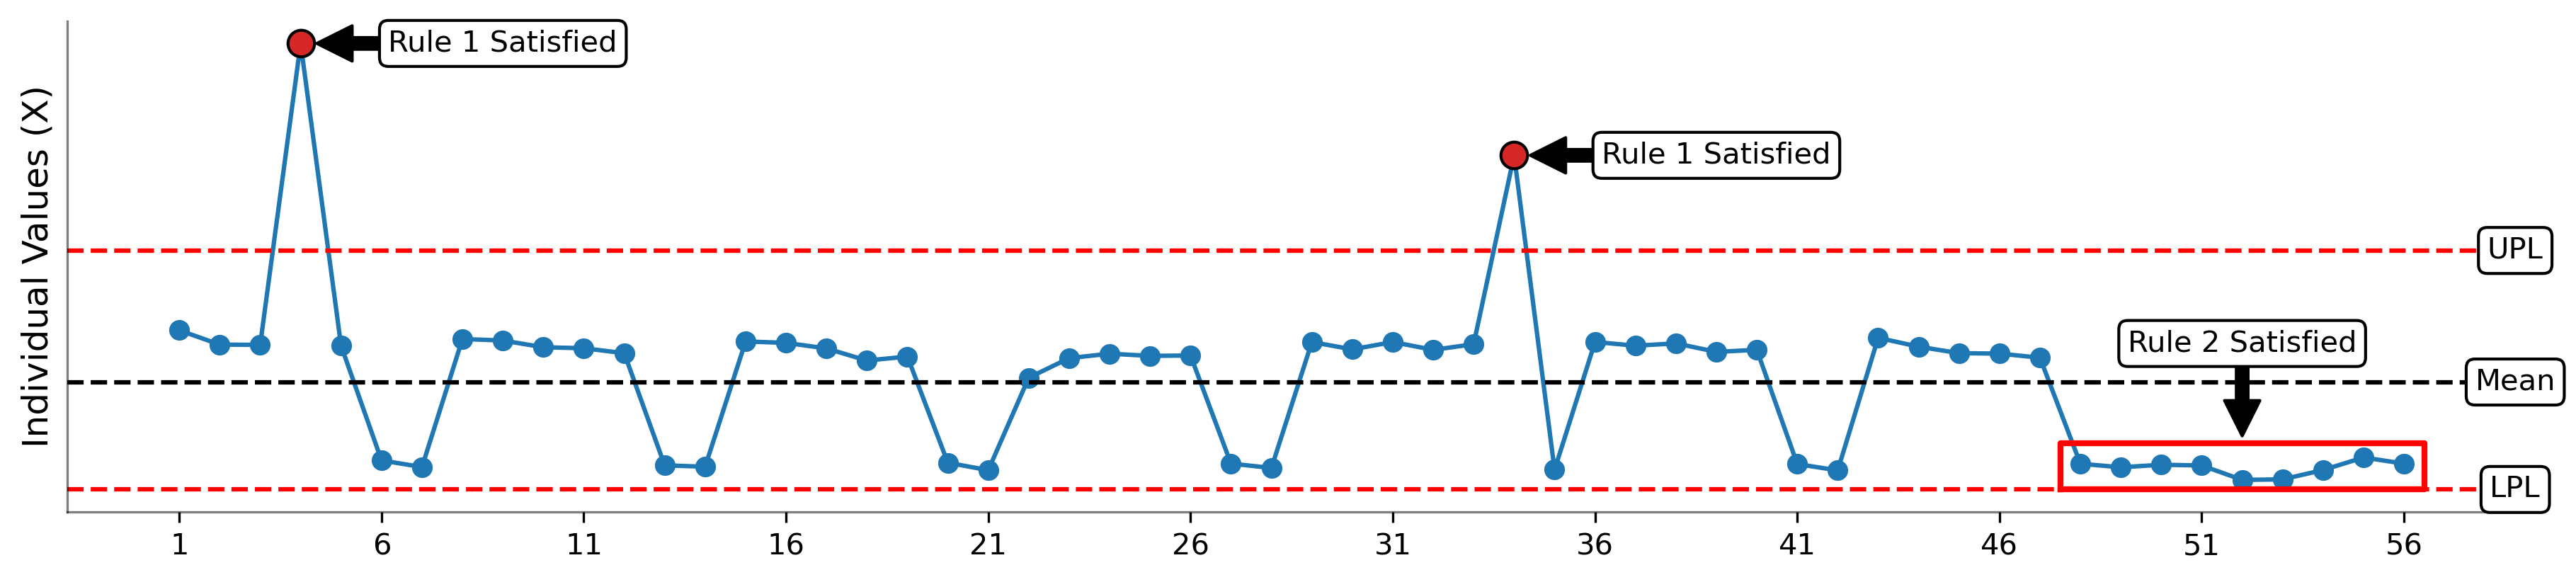

In [61]:
# Generate the X-chart
fig, ax = plt.subplots(figsize=(15,3), dpi=300)

# Plot data 
ax.plot(labels, data, marker='o')

# Add masking parameters to color values outside process limits
ax.plot(labels, lower_lim, marker='o', ls='none', color='tab:red',
        markeredgecolor='black', markersize=9)
ax.plot(labels, upper_lim, marker='o', ls='none', color='tab:red',
        markeredgecolor='black', markersize=9)

# Add text labels for limits and centerline
bbox_props = dict(boxstyle="round,pad=0.3", fc="white", ec="black", lw=1)
ax.text(ax.get_xlim()[1], UPL, 'UPL', 
        color='black', ha='center', va='center', bbox=bbox_props)
ax.text(ax.get_xlim()[1], LPL, 'LPL',
        color='black', ha='center', va='center', bbox=bbox_props)
ax.text(ax.get_xlim()[1], mean, 'Mean', 
        color='black', ha='center', va='center', bbox=bbox_props)

# Add centerline and process limits 
for value, color in xchart_lines:
    ax.axhline(value, ls='--', c=color)

# Specify spine visibility 
sns.despine()
ax.spines[['left','bottom']].set_alpha(0.5)

# Set the x-tick labels with increased intervals
tick_interval = tickinterval 
tick_positions = np.arange(0, len(labels), tick_interval)
ax.set_xticks(tick_positions)
ax.set_xticklabels(labels.iloc[tick_positions], rotation=0, ha='center') 

# Specify axis labels and title
plt.xlabel("",fontsize=12)
plt.ylabel("Individual Values (X)", fontsize=12)
plt.title("", fontsize=14)

# Define details for annotations (text, xy-coordinates, xytext-coordinates)
annotations = [
    ('Rule 1 Satisfied', (3.4,9165), (8,9165)),
    ('Rule 1 Satisfied', (33.4,6866), (38,6866)),
    ('Rule 2 Satisfied', (51,1100), (51, 3000))
]

# Add annotations using a loop
for text, xy, xytext in annotations:
    ax.annotate(text, xy=xy, xytext=xytext,
                ha='center', va='center', fontsize=10,
                bbox=dict(facecolor='white', boxstyle='round'),
                arrowprops=dict(facecolor='black'))

# Add box for highlighting range of values satisfying Rule 2
start_index = 46.5  
end_index = 55.5  
y_min = 1  
y_max = 950    

# Add a border using plt.plot()
plt.plot([start_index, end_index, end_index, start_index, start_index], 
         [y_min, y_min, y_max, y_max, y_min], color='red', linewidth=2)

# Remove yticks
ax.set_yticks([])

# Show plot
plt.show()

## Fig 18.3: Rule 3 satisfied

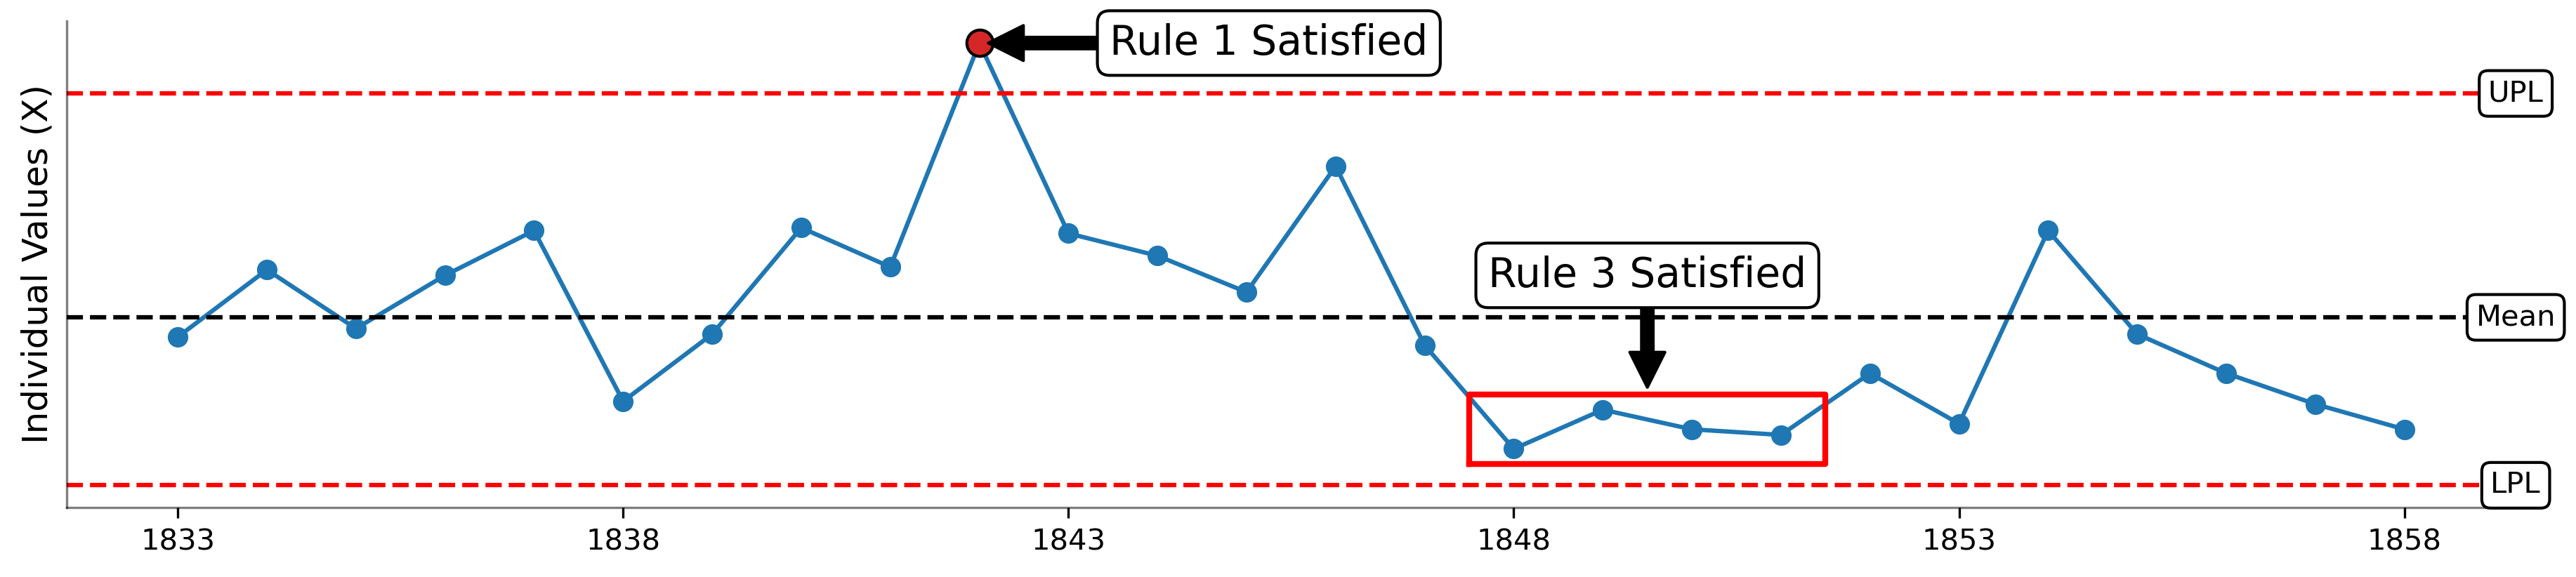

In [69]:
# Specify round_value
round_value = 0

# Specify tickinterval
tickinterval = 5

# Disaggregate the dataframe 
data = first_clinic["Death-to-Birth Ratio"]
moving_ranges = round(abs(data.diff()),round_value)
labels = first_clinic["Year"]

# Add moving ranges to df as column
first_clinic = first_clinic.copy()
first_clinic['Moving Ranges'] = pd.Series(moving_ranges)

# Calculate the mean
mean = round(data.mean(),round_value)
# Calculate the average moving range 
average_mR = round(moving_ranges.mean(),round_value)

# Define the value of C1 and C2and calculate the UPL and LPL
C1 = 2.660
C2 = 3.268
# Calculate the process limits
UPL = round(mean + (C1*average_mR),round_value)
LPL = round(mean - (C1*average_mR),round_value)
# Calculate process limit range (PLR)
PLR = UPL - LPL
# Conditionally determine LPL if LPL is less than zero
LPL = max(LPL,0)
# Calculate the Upper Range Limit
URL = round(C2*average_mR,round_value)

# Create masking parameters for values greater than and less than the process limits on X-chart
upper_lim = np.ma.masked_where(data < UPL, data)
lower_lim = np.ma.masked_where(data > LPL, data)
# Create masking parameters for values greater than URL on mR-chart
url_greater = np.ma.masked_where(moving_ranges <= URL, moving_ranges)
url_less = np.ma.masked_where(moving_ranges > URL, moving_ranges)

# Create list of tuples that specify value and color for mean, AmR, UPL, LPL, and URL
xchart_lines = [(mean,'black'), (UPL,'red'), (LPL,'red')]
mrchart_lines = [(average_mR,'black'), (URL,'red')]
# Create list of tuples with y-coordinate and labels for x-chart process limits and centerline 
xchart_labels = [(UPL,UPL),(LPL,LPL),(mean,mean)]
# Create list of tuples with y-coordinate and labels for mR-chart process limit and centerline
mrchart_labels = [(URL,URL),(average_mR,average_mR)]

# Generate the X-chart
fig, ax = plt.subplots(figsize=(15,3), dpi=300)

# Plot data 
ax.plot(labels, data, marker='o')

# Add masking parameters to color values outside process limits
ax.plot(labels, lower_lim, marker='o', ls='none', color='tab:red',
        markeredgecolor='black', markersize=9)
ax.plot(labels, upper_lim, marker='o', ls='none', color='tab:red',
        markeredgecolor='black', markersize=9)

# Add text labels for limits and centerline
bbox_props = dict(boxstyle="round,pad=0.3", fc="white", ec="black", lw=1)
ax.text(ax.get_xlim()[1], UPL, 'UPL', color='black', ha='center', va='center', bbox=bbox_props)
ax.text(ax.get_xlim()[1], LPL, 'LPL', color='black', ha='center', va='center', bbox=bbox_props)
ax.text(ax.get_xlim()[1], mean, 'Mean', color='black', ha='center', va='center', bbox=bbox_props)

# Add centerline and process limits 
for value, color in xchart_lines:
    plt.axhline(value, ls='--', c=color)

# Specify spine visibility 
sns.despine()
ax.spines[['left','bottom']].set_alpha(0.5)

# Set the x-tick labels with increased intervals
tick_interval = tickinterval  # Increase this value to increase the spacing between ticks
tick_positions = np.arange(0, len(labels), tick_interval)
ax.set_xticks(tick_positions)
ax.set_xticklabels(labels.iloc[tick_positions], rotation=0, ha='center') 

# Specify axis labels and title
plt.xlabel("",fontsize=12)
plt.ylabel("Individual Values (X)", fontsize=12)
plt.title("", fontsize=14)

# Add annotation for highlighting value that satisfies Rule 1
plt.annotate('Rule 1 Satisfied', 
             xy=(9.1, 15.8),  # x, y coordinates of the annotation
             xytext=(12.25, 15.8),  # Position of the text
             fontsize=14,
             color='black',
             horizontalalignment='center',
             verticalalignment='center', 
             bbox=dict(facecolor='white', edgecolor='black', boxstyle='round'), 
             arrowprops=dict(facecolor='black'))


# Add box for highlighting range of values satisfying Rule 3
start_index = 14.5 
end_index = 18.5   
y_min = 0.75  
y_max = 3.25  

# Add a border using plt.plot()
plt.plot([start_index, end_index, end_index, start_index, start_index], 
         [y_min, y_min, y_max, y_max, y_min], color='red', linewidth=2)

# Adding annotations
plt.annotate('Rule 3 Satisfied', 
             xy=(16.5, 3.5),  # x, y coordinates of the annotation
             xytext=(16.5, 7.5),  # Position of the text
             fontsize=14,
             color='black',
             horizontalalignment='center', 
             va='center', 
             bbox=dict(facecolor='white', edgecolor='black', boxstyle='round'), 
             arrowprops=dict(facecolor='black'))

# Remove yticks
ax.set_yticks([])

# Show plot
plt.show()